In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get the data
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

File 'moore.csv' already there; not retrieving.



In [3]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:,1].reshape(-1, 1)

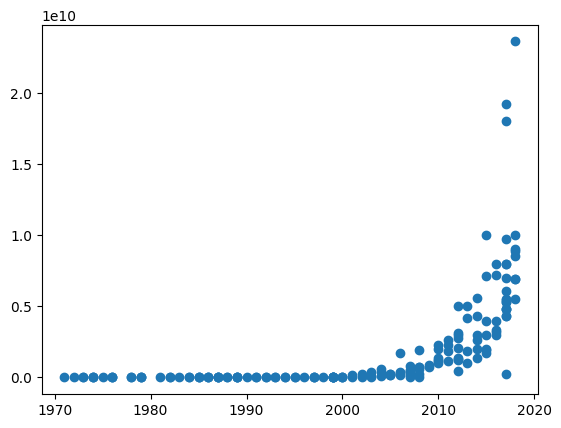

In [4]:
# Plot the data - it is exponential!
plt.scatter(X, Y)

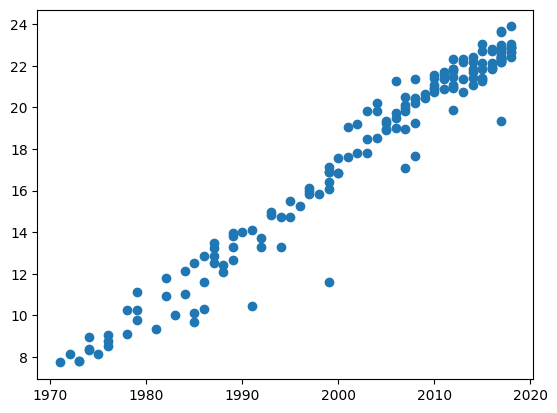

In [5]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X, Y);
# that's better

In [6]:
# Scale and center both the x and y axes
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X - mx)/sx
Y = (Y - my)/sy

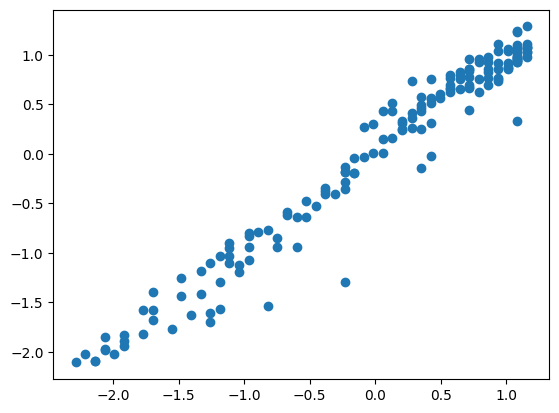

In [7]:
# Everything is centered and in a small range
plt.scatter(X, Y);

In [8]:
# Cast to float32
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [9]:
# Create the linear regression model
model = nn.Linear(1, 1)

In [10]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [11]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [12]:
type(inputs)

torch.Tensor

In [13]:
# Train the model
n_epochs = 100
losses = []
for it in range(n_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Record the loss
    losses.append(loss.item())

    # Backward and optimize
    loss.backward()
    optimizer.step()

    print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/100, Loss: 0.4232
Epoch 2/100, Loss: 0.4080
Epoch 3/100, Loss: 0.3831
Epoch 4/100, Loss: 0.3529
Epoch 5/100, Loss: 0.3205
Epoch 6/100, Loss: 0.2882
Epoch 7/100, Loss: 0.2573
Epoch 8/100, Loss: 0.2286
Epoch 9/100, Loss: 0.2026
Epoch 10/100, Loss: 0.1794
Epoch 11/100, Loss: 0.1589
Epoch 12/100, Loss: 0.1410
Epoch 13/100, Loss: 0.1256
Epoch 14/100, Loss: 0.1122
Epoch 15/100, Loss: 0.1008
Epoch 16/100, Loss: 0.0911
Epoch 17/100, Loss: 0.0828
Epoch 18/100, Loss: 0.0758
Epoch 19/100, Loss: 0.0699
Epoch 20/100, Loss: 0.0649
Epoch 21/100, Loss: 0.0606
Epoch 22/100, Loss: 0.0571
Epoch 23/100, Loss: 0.0541
Epoch 24/100, Loss: 0.0516
Epoch 25/100, Loss: 0.0494
Epoch 26/100, Loss: 0.0477
Epoch 27/100, Loss: 0.0462
Epoch 28/100, Loss: 0.0449
Epoch 29/100, Loss: 0.0439
Epoch 30/100, Loss: 0.0430
Epoch 31/100, Loss: 0.0423
Epoch 32/100, Loss: 0.0417
Epoch 33/100, Loss: 0.0411
Epoch 34/100, Loss: 0.0407
Epoch 35/100, Loss: 0.0403
Epoch 36/100, Loss: 0.0400
Epoch 37/100, Loss: 0.0398
Epoch 38/1

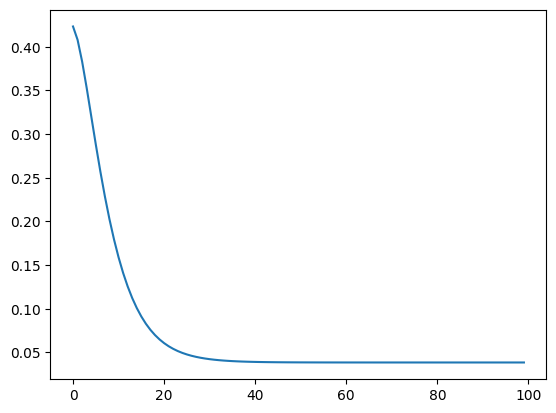

In [14]:
# Loss per iteration
plt.plot(losses);

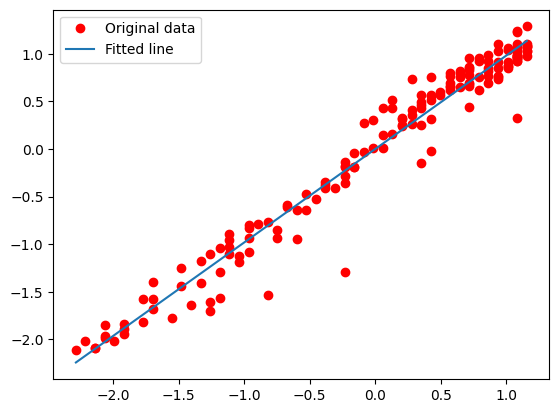

In [15]:
# Plot the graph
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [16]:
# What does this mean?
w = model.weight.data.numpy()
print(w)

[[0.9804951]]


In [17]:
a = w[0,0] * sy / sx
print(a)

0.34165599529822


In [18]:
print("Time to double:", np.log(2) / a)

Time to double: 2.028786820951058
